In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# import raw file from dataset

u = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/T_FRUDSAB.csv')

display(u.shape)# show shape and head
u[:5]


/var/folders/f1/dmgdbt5j5nb5ht5_vfxmr8gm0000gn/T/ipykernel_2151/1788243214.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  u = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/T_FRUDSAB.csv')


(24930, 66)

,PATIENTNUMBER,SITE,VISIT,PATIENTID,VISITID,UDS013,UDS013_UNIT,UDS013_NORM,UDS013A,UDS005,UDS005_UNIT,UDS005_NORM,UDS005A,AB001,AB001_UNIT,AB001_NORM,AB001A,AB001B,AB001B_UNIT,AB001B_NORM,AB002,UDS001,UDS001_UNIT,UDS001_NORM,UDS001A,UDS001A_UNIT,UDS001A_NORM,UDS001B,UDS002,UDS003,UDS003_UNIT,UDS003_NORM,UDS004,UDS004_UNIT,UDS004_NORM,UDS011A,UDS012,UDS012_UNIT,UDS012_NORM,UDS012A,UDS006,UDS006_UNIT,UDS006_NORM,UDS006A,UDS007,UDS007_UNIT,UDS007_NORM,UDS007A,UDS008,UDS008_UNIT,UDS008_NORM,UDS008A,UDS009,UDS009_UNIT,UDS009_NORM,UDS009A,UDS010,UDS010_UNIT,UDS010_NORM,UDS010A,UDS011,UDS011_UNIT,UDS011_NORM,UDS002_dt,AB001A_dt,patdeid
0,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,mg / mL,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,-2.0,-2.0,1
1,NaN,NaN,WK1,NaN,15037,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,mg / mL,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,6.0,6.0,1
2,NaN,NaN,WK2,NaN,15040,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,mg / mL,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,16.0,16.0,1
3,NaN,NaN,WK3,NaN,15043,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,mg / mL,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,22.0,22.0,1
4,NaN,NaN,WK4,NaN,15046,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,0.0,mg / mL,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN,0.0,34.0,34.0,1


In [3]:
# drop columns that aren't being used for this project

u = u.drop(columns=[col for col in u.columns if col not in ['patdeid','VISIT','AB001','AB001B','UDS001','UDS001A','UDS001B', 'UDS003', 'UDS004', 'UDS005', 'UDS006', 'UDS007', 'UDS008', 'UDS009', 'UDS010', 'UDS011', 'UDS012', 'UDS013']])

# annotate column names for interpretability
new_column_names = {'AB001':'t_alcohol','AB001B':'alc_result','UDS001':'urine_test','UDS001A':'refuse_reason','UDS001B':'other_reason', 'UDS003':'urine_temp','UDS004':'supervised','UDS005':'t_Amphetamines', 'UDS006':'t_Benzodiazapines','UDS007':'t_Methadone', 'UDS008':'t_Oxycodone', 'UDS009':'t_Cocaine', 'UDS010':'t_Methamphetamine', 'UDS011':'t_Opiate300', 'UDS012':'t_Cannabinoids', 'UDS013':'t_Propoxyphene'}

# execute rename columns
u = u.rename(columns=new_column_names)

# view first 5 rows
u[:5]

,VISIT,t_Propoxyphene,t_Amphetamines,t_alcohol,alc_result,urine_test,refuse_reason,other_reason,urine_temp,supervised,t_Cannabinoids,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,patdeid
0,BASELINE,0.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,WK1,0.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,WK2,0.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,WK3,0.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,WK4,0.0,1.0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [4]:
# remove 'WK' from VISIT and convert to int for ordinal value
u.VISIT = u.VISIT.str.replace('WK', '')

# replace 'BASELINE' with 0 for ordinal value
u.VISIT = u.VISIT.replace('BASELINE', 0)

# convert VISIT to int
u.VISIT = u.VISIT.astype(np.int64)

In [5]:
# reindex column order for interpretability

u = u.reindex(columns=['patdeid','VISIT','t_alcohol','alc_result','urine_test','refuse_reason','other_reason','urine_temp','supervised','t_Amphetamines','t_Benzodiazapines', 't_Methadone','t_Oxycodone','t_Cocaine','t_Methamphetamine','t_Opiate300','t_Cannabinoids','t_Propoxyphene'])

u[:5]

,patdeid,VISIT,t_alcohol,alc_result,urine_test,refuse_reason,other_reason,urine_temp,supervised,t_Amphetamines,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,t_Cannabinoids,t_Propoxyphene
0,1,0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,2,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,1.0,0.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
u['total_visits'] = u.groupby('patdeid')['VISIT'].transform('nunique')

In [7]:
u.columns.get_loc('total_visits')

18

In [8]:
# remove column at index position 18 and store it in a variable
col = u.pop(u.columns[18])

# insert the column at index position 2
u.insert(2, col.name, col)

u[:5]

,patdeid,VISIT,total_visits,t_alcohol,alc_result,urine_test,refuse_reason,other_reason,urine_temp,supervised,t_Amphetamines,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,t_Cannabinoids,t_Propoxyphene
0,1,0,26,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,26,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,2,26,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,26,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,26,1.0,0.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Feature engineering
Before we do anything else, we must create the target variable.  A patient must meet 2 conditions to have reached the desired outcomes, listed as follows:<br>

1.  Complete 24 weeks of treatment (this is validated by looking at the final 4 tests)<br>
2.  Show 4 consecutive clean urine tests for opiates for visits 21 -24

In [9]:
# creat column for target
u['outcome'] = None

# look for unique patient id in patdeid column
for i in u['patdeid'].unique():
    
    # if a unique value in visit and visit value is in week 21,22,23,24 and t_Opiate300 (test) is 0
    if (u[(u['patdeid']==i) & (u['VISIT'].isin([21,22,23,24])) & (u['t_Opiate300']==0)].shape[0] == 4):
        
        # set outcome to 1 for each unique patient id for week 0
        u.loc[(u['patdeid']==i)&(u.VISIT==0), 'outcome'] = 1.0
    
    else: # set outcome to 0 fopr each unique patient id for week 0
         u.loc[(u['patdeid']==i)&(u.VISIT==0), 'outcome'] = 0.0

# replace NaN with 0
u['outcome'] = u['outcome'].replace(np.nan, 0.0)

In [12]:
# we can validate that the target reflects the outcome by sampling patient data
# we create a dataframe for each unique patient id and observe the outcome column
# any patient that shows 4 clean urine tests == 0 for the last 4 visits (21,22,23,24) will have a target of 1
# every time the cell is run a new patient is sampled to test the target is working properly

def random(df):
    return np.random.choice(u.patdeid)
    
u.loc[u.patdeid==random(u),['patdeid','VISIT','t_Opiate300','outcome']][:25]

,patdeid,VISIT,t_Opiate300,outcome
23609,1834,0,1.0,1.0
23610,1834,1,0.0,0.0
23611,1834,2,0.0,0.0
23612,1834,3,0.0,0.0
23613,1834,4,0.0,0.0
23614,1834,5,0.0,0.0
23615,1834,6,0.0,0.0
23616,1834,7,0.0,0.0
23617,1834,8,0.0,0.0
23618,1834,9,0.0,0.0


In [13]:
# save target to merge later.  We do not need to consolidate the data, just extract the unique patient ID and outcome to merge later on to the main dataframe
target = u.loc[:,['patdeid','outcome']].drop_duplicates(subset='patdeid',keep='first').reset_index(drop=True)

In [14]:
# save to csv
target.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/feature_engineering_data/target.csv', index=False)

In [15]:
target.patdeid.size

1917

In [16]:
treatment_retention = u.groupby('patdeid').agg({'total_visits':'max'}).reset_index().total_visits.value_counts().sort_index(ascending=True) 

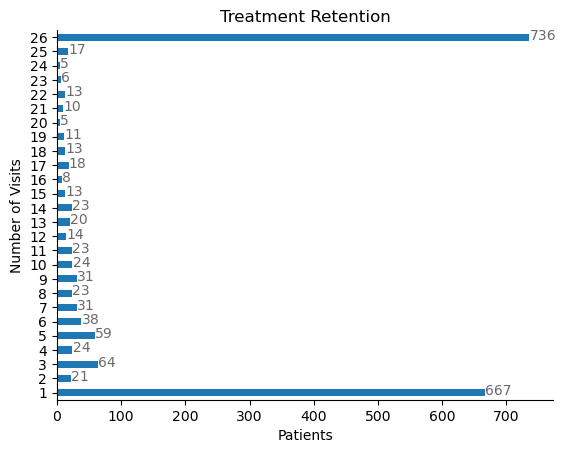

In [17]:
ax = treatment_retention.plot(kind='barh')
ax.set_title('Treatment Retention')
ax.set_xlabel('Patients')
ax.set_ylabel('Number of Visits')
ax.set_yticklabels(treatment_retention.index, rotation=0)
# label values on each data point
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.1, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')
# remove border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [16]:
# save treatment retention to csv
treatment_retention.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/feature_engineering_data/treatment_retention.csv', index=False)

In [17]:
u = u.drop(columns=['outcome','total_visits'])

In [18]:
u[:5]

,patdeid,VISIT,t_alcohol,alc_result,urine_test,refuse_reason,other_reason,urine_temp,supervised,t_Amphetamines,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,t_Cannabinoids,t_Propoxyphene
0,1,0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,2,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,1.0,0.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Target variable was successfully created.  
### There are 2 more steps remaining

- Create separate dataframe for target, to merge later
- We must reshape dataframe so that there is only 1 row per patient

### Now we will reshape the dataframe down to 1 row per patient for merge

In [19]:


# print shape and name of ea dataframe next to eachother
for i in range(0,25):
    print(globals()['VISIT%s' % i].shape, 'VISIT%s' % i)

(1917, 18) VISIT0
(1241, 18) VISIT1
(1215, 18) VISIT2
(1154, 18) VISIT3
(1133, 18) VISIT4
(1064, 18) VISIT5
(1032, 18) VISIT6
(996, 18) VISIT7
(984, 18) VISIT8
(948, 18) VISIT9
(922, 18) VISIT10
(898, 18) VISIT11
(903, 18) VISIT12
(865, 18) VISIT13
(850, 18) VISIT14
(837, 18) VISIT15
(837, 18) VISIT16
(809, 18) VISIT17
(798, 18) VISIT18
(788, 18) VISIT19
(791, 18) VISIT20
(774, 18) VISIT21
(764, 18) VISIT22
(756, 18) VISIT23
(912, 18) VISIT24


In [18]:
# create a new dataframe for every filter of visit column
# the name of the dataframe with be VISIT+number of visit
for i in u['VISIT'].unique():
    globals()['VISIT%s' % i] = u[u['VISIT']==i]

# for each dataframe beteween VISIT0 and VISIT24
# add the value in VISIT to the end of the name of each column +"-"+"visit"
# do not change the patdeid column
for i in range(0,25):
    for col in globals()['VISIT%s' % i].columns:
        if col != 'patdeid':
            globals()['VISIT%s' % i][col+'_'+str(i)] = globals()['VISIT%s' % i][col]
            globals()['VISIT%s' % i] = globals()['VISIT%s' % i].drop(columns=col)

# merge all dfs using left merge on patdeid
for i in range(0,25):
    if i == 0:
        df = pd.merge(globals()['VISIT%s' % i], globals()['VISIT%s' % (i+1)], on='patdeid', how='left')
    elif i < 24:
        df = pd.merge(df, globals()['VISIT%s' % (i+1)], on='patdeid', how='left')
    else:
        pass

# remove columns that start with 'VISIT'
df = df.drop(columns=[col for col in df.columns if col.startswith('VISIT')])

display(df.shape)
df[:5]

/var/folders/f1/dmgdbt5j5nb5ht5_vfxmr8gm0000gn/T/ipykernel_2151/3780682166.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()['VISIT%s' % i][col+'_'+str(i)] = globals()['VISIT%s' % i][col]
/var/folders/f1/dmgdbt5j5nb5ht5_vfxmr8gm0000gn/T/ipykernel_2151/3780682166.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()['VISIT%s' % i][col+'_'+str(i)] = globals()['VISIT%s' % i][col]
/var/folders/f1/dmgdbt5j5nb5ht5_vfxmr8gm0000gn/T/ipykernel_2151/3780682166.py:12: SettingWithCopyWarning: 
A v

(1917, 451)

,patdeid,total_visits_0,t_alcohol_0,alc_result_0,urine_test_0,refuse_reason_0,other_reason_0,urine_temp_0,supervised_0,t_Amphetamines_0,t_Benzodiazapines_0,t_Methadone_0,t_Oxycodone_0,t_Cocaine_0,t_Methamphetamine_0,t_Opiate300_0,t_Cannabinoids_0,t_Propoxyphene_0,outcome_0,total_visits_1,t_alcohol_1,alc_result_1,urine_test_1,refuse_reason_1,other_reason_1,urine_temp_1,supervised_1,t_Amphetamines_1,t_Benzodiazapines_1,t_Methadone_1,t_Oxycodone_1,t_Cocaine_1,t_Methamphetamine_1,t_Opiate300_1,t_Cannabinoids_1,t_Propoxyphene_1,outcome_1,total_visits_2,t_alcohol_2,alc_result_2,urine_test_2,refuse_reason_2,other_reason_2,urine_temp_2,supervised_2,t_Amphetamines_2,t_Benzodiazapines_2,t_Methadone_2,t_Oxycodone_2,t_Cocaine_2,t_Methamphetamine_2,t_Opiate300_2,t_Cannabinoids_2,t_Propoxyphene_2,outcome_2,total_visits_3,t_alcohol_3,alc_result_3,urine_test_3,refuse_reason_3,other_reason_3,urine_temp_3,supervised_3,t_Amphetamines_3,t_Benzodiazapines_3,t_Methadone_3,t_Oxycodone_3,t_Cocaine_3,t_Methamphetamine_3,t_Opiate300_3,t_Cannabinoids_3,t_Propoxyphene_3,outcome_3,total_visits_4,t_alcohol_4,alc_result_4,urine_test_4,refuse_reason_4,other_reason_4,urine_temp_4,supervised_4,t_Amphetamines_4,t_Benzodiazapines_4,t_Methadone_4,t_Oxycodone_4,t_Cocaine_4,t_Methamphetamine_4,t_Opiate300_4,t_Cannabinoids_4,t_Propoxyphene_4,outcome_4,total_visits_5,t_alcohol_5,alc_result_5,urine_test_5,refuse_reason_5,other_reason_5,urine_temp_5,supervised_5,t_Amphetamines_5,t_Benzodiazapines_5,t_Methadone_5,t_Oxycodone_5,t_Cocaine_5,t_Methamphetamine_5,t_Opiate300_5,t_Cannabinoids_5,t_Propoxyphene_5,outcome_5,total_visits_6,t_alcohol_6,alc_result_6,urine_test_6,refuse_reason_6,other_reason_6,urine_temp_6,supervised_6,t_Amphetamines_6,t_Benzodiazapines_6,t_Methadone_6,t_Oxycodone_6,t_Cocaine_6,t_Methamphetamine_6,t_Opiate300_6,t_Cannabinoids_6,t_Propoxyphene_6,outcome_6,total_visits_7,t_alcohol_7,alc_result_7,urine_test_7,refuse_reason_7,other_reason_7,urine_temp_7,supervised_7,t_Amphetamines_7,t_Benzodiazapines_7,t_Methadone_7,t_Oxycodone_7,t_Cocaine_7,t_Methamphetamine_7,t_Opiate300_7,t_Cannabinoids_7,t_Propoxyphene_7,outcome_7,total_visits_8,t_alcohol_8,alc_result_8,urine_test_8,refuse_reason_8,other_reason_8,urine_temp_8,supervised_8,t_Amphetamines_8,t_Benzodiazapines_8,t_Methadone_8,t_Oxycodone_8,t_Cocaine_8,t_Methamphetamine_8,t_Opiate300_8,t_Cannabinoids_8,t_Propoxyphene_8,outcome_8,total_visits_9,t_alcohol_9,alc_result_9,urine_test_9,refuse_reason_9,other_reason_9,urine_temp_9,supervised_9,t_Amphetamines_9,t_Benzodiazapines_9,t_Methadone_9,t_Oxycodone_9,t_Cocaine_9,t_Methamphetamine_9,t_Opiate300_9,t_Cannabinoids_9,t_Propoxyphene_9,outcome_9,total_visits_10,t_alcohol_10,alc_result_10,urine_test_10,refuse_reason_10,other_reason_10,urine_temp_10,supervised_10,t_Amphetamines_10,t_Benzodiazapines_10,t_Methadone_10,t_Oxycodone_10,t_Cocaine_10,t_Methamphetamine_10,t_Opiate300_10,t_Cannabinoids_10,t_Propoxyphene_10,outcome_10,total_visits_11,t_alcohol_11,alc_result_11,urine_test_11,refuse_reason_11,other_reason_11,urine_temp_11,supervised_11,t_Amphetamines_11,t_Benzodiazapines_11,t_Methadone_11,t_Oxycodone_11,t_Cocaine_11,t_Methamphetamine_11,t_Opiate300_11,t_Cannabinoids_11,t_Propoxyphene_11,outcome_11,total_visits_12,t_alcohol_12,alc_result_12,urine_test_12,refuse_reason_12,other_reason_12,urine_temp_12,supervised_12,t_Amphetamines_12,t_Benzodiazapines_12,t_Methadone_12,t_Oxycodone_12,t_Cocaine_12,t_Methamphetamine_12,t_Opiate300_12,t_Cannabinoids_12,t_Propoxyphene_12,outcome_12,total_visits_13,t_alcohol_13,alc_result_13,urine_test_13,refuse_reason_13,other_reason_13,urine_temp_13,supervised_13,t_Amphetamines_13,t_Benzodiazapines_13,t_Methadone_13,t_Oxycodone_13,t_Cocaine_13,t_Methamphetamine_13,t_Opiate300_13,t_Cannabinoids_13,t_Propoxyphene_13,outcome_13,total_visits_14,t_alcohol_14,alc_result_14,urine_test_14,refuse_reason_14,other_reason_14,urine_temp_14,supervised_14,t_Amphetamines_14,t_Benzodiazapines_14,t_Methadone_14,t_Oxycodone_14,t_Cocaine_14,t_Methamp

In [21]:
(df.isnull().sum()/9).round(2)

patdeid                   0.00
t_alcohol_0              11.00
alc_result_0             13.33
urine_test_0             11.11
refuse_reason_0         212.00
other_reason_0          212.33
urine_temp_0             12.11
supervised_0             12.11
t_Amphetamines_0         11.22
t_Benzodiazapines_0      11.22
t_Methadone_0            11.22
t_Oxycodone_0            11.22
t_Cocaine_0              11.22
t_Methamphetamine_0      11.22
t_Opiate300_0            11.22
t_Cannabinoids_0         11.22
t_Propoxyphene_0         11.22
t_alcohol_1              93.89
alc_result_1             94.89
urine_test_1             93.89
refuse_reason_1         211.00
other_reason_1          212.33
urine_temp_1             95.89
supervised_1             95.89
t_Amphetamines_1         94.00
t_Benzodiazapines_1      94.00
t_Methadone_1            94.00
t_Oxycodone_1            94.00
t_Cocaine_1              94.00
t_Methamphetamine_1      94.00
t_Opiate300_1            94.00
t_Cannabinoids_1         94.00
t_Propox

In [22]:
# save df to csv
df.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/feature_engineering_data/urine_drug_screen.csv')